In [1]:
# for numerical operations
import numpy as np

# for dataframe operations
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for machine learning algo
import sklearn

# for imbalance dataset
import imblearn

In [2]:
# To set background for data visualization
plt.style.use('fivethirtyeight')

In [3]:
# for any other background
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [4]:
# Lets import the dataset using the read_csv function
data = pd.read_csv('LoanData.csv')

In [5]:
# Lets check the shape of the dataset ( Rows , columns)
data.shape

(614, 13)

In [6]:
# Lets check the column names present in the dataset
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
# lets check the head of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Descriptive statistics:

In [8]:
# for numerical variables 
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# for categorical variables
data.describe(include= 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [10]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# Data cleaning

In [11]:
# Checking no. of missing values:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# using mode values to impute categorical columns
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

# using median values to impute Numerical columns
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

#Lets check whether any null value left or not
data.isnull().sum().sum()

0

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

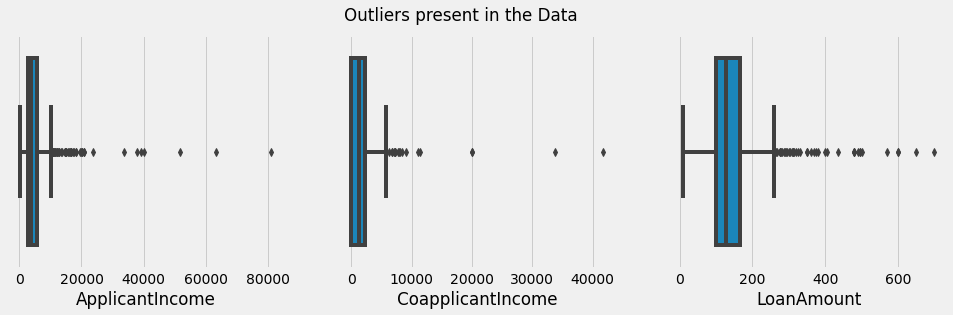

In [13]:
# Lets visualize the outliers using Box Plot

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,4)

plt.subplot(1,3,1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Outliers present in the Data')
plt.show()

In [14]:
# Lets remove the outliers from the Data

# Lets check the shape before removing Outliers
print("Before Removing Outliers",data.shape)

#lets filter the customers having more than 25000 income
data = data[data['ApplicantIncome'] < 25000]

#lets check the shape after removing Outliers
print("After Removing Outliers" , data.shape)

Before Removing Outliers (614, 13)
After Removing Outliers (607, 13)


In [15]:
# Lets remove the outliers from the Coapplicant's Income

# Lets check the shape before removing Outliers
print("Before Removing Outliers",data.shape)

#lets filter the customers having more than 10000 Coapplicant Income
data = data[data['CoapplicantIncome'] < 10000]

#lets check the shape after removing Outliers
print("After Removing Outliers" , data.shape)

Before Removing Outliers (607, 13)
After Removing Outliers (601, 13)


In [16]:
# Lets remove the outliers from the Loan Amount

# Lets check the shape before removing Outliers
print("Before Removing Outliers",data.shape)

#lets filter the customers having more than 400 Loan Amount
data = data[data['LoanAmount'] < 400]

#lets check the shape after removing Outliers
print("After Removing Outliers" , data.shape)

Before Removing Outliers (601, 13)
After Removing Outliers (590, 13)


# Univariate Data Analysis

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

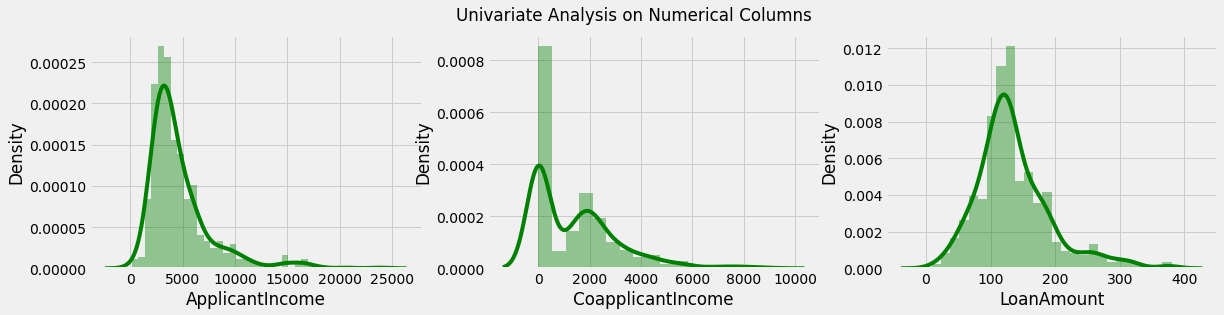

In [17]:
# Univariate Analysis on numerical columns

plt.rcParams['figure.figsize'] = (18,4)
plt.subplot(1,3,1)
sns.distplot(data['ApplicantIncome'], color = 'green')

plt.subplot(1,3,2)
sns.distplot(data['CoapplicantIncome'], color = 'green')

plt.subplot(1,3,3)
sns.distplot(data['LoanAmount'], color = 'green')

plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()


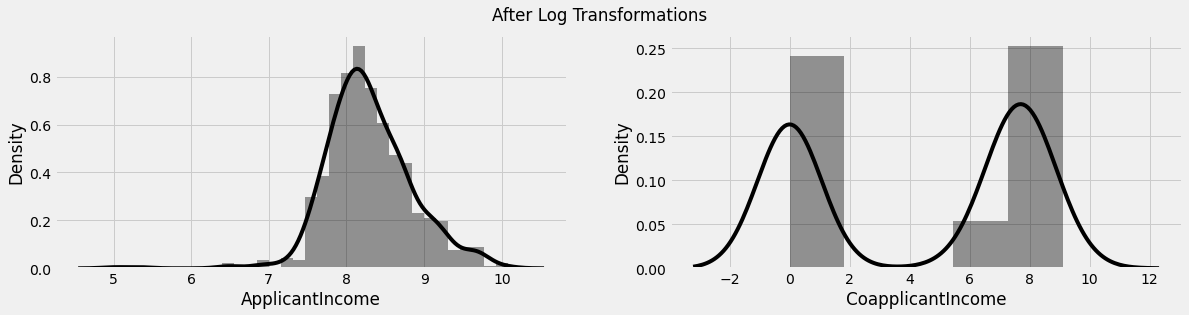

In [18]:
# lets remove skewness from Applicant income and Coapplicant income , as it can add bias to the data .
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (18,4)

#Lets apply log transformation to remove the skewness
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])

# Lets plot them and check whether the skewness is removed or not
plt.subplot(1,2,1)
sns.distplot(data['ApplicantIncome'] , color = 'black')

plt.subplot(1,2,2)
sns.distplot(data['CoapplicantIncome'] , color = 'black')

plt.suptitle('After Log Transformations')
plt.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

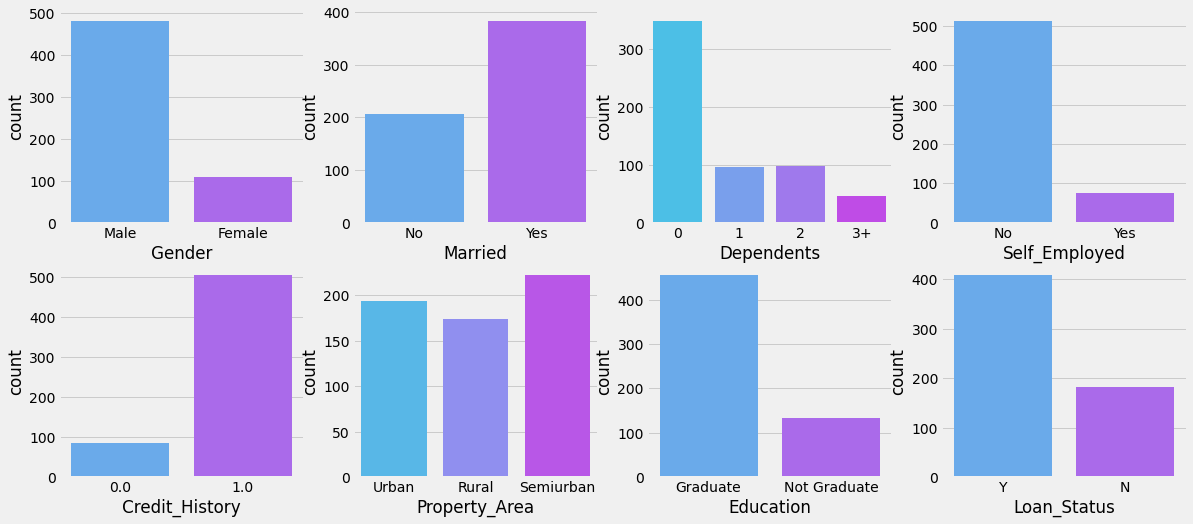

In [19]:
# Univariate Data analysis on categorical columns

plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(2,4,1)
sns.countplot(data['Gender'], palette = 'cool')

plt.subplot(2,4,2)
sns.countplot(data['Married'], palette = 'cool')

plt.subplot(2,4,3)
sns.countplot(data['Dependents'], palette = 'cool')

plt.subplot(2,4,4)
sns.countplot(data['Self_Employed'], palette = 'cool')

plt.subplot(2,4,5)
sns.countplot(data['Credit_History'], palette = 'cool')

plt.subplot(2,4,6)
sns.countplot(data['Property_Area'], palette = 'cool')

plt.subplot(2,4,7)
sns.countplot(data['Education'], palette = 'cool')

plt.subplot(2,4,8)
sns.countplot(data['Loan_Status'], palette = 'cool')

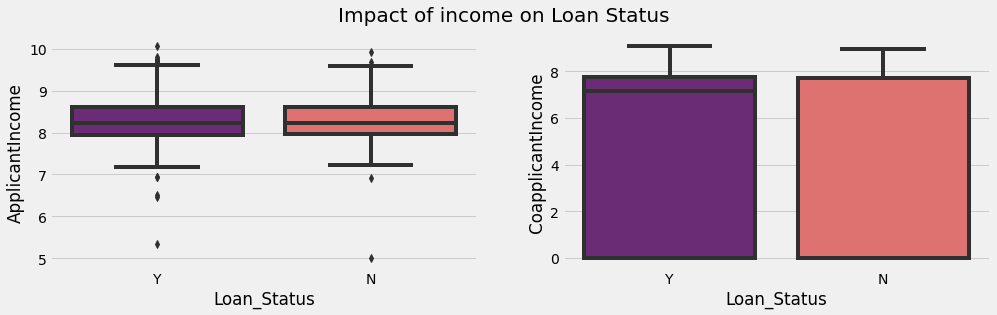

In [20]:
# Lets check the impact of Income of Applicants and Coapplicants on Loan status

plt.rcParams['figure.figsize'] = (15,4)

plt.subplot(1,2,1)
sns.boxplot(data['Loan_Status'],data['ApplicantIncome'],palette = 'magma')

plt.subplot(1,2,2)
sns.boxplot(data['Loan_Status'] , data['CoapplicantIncome'] , palette = 'magma')

plt.suptitle('Impact of income on Loan Status\n' , fontsize = 20)
plt.show()

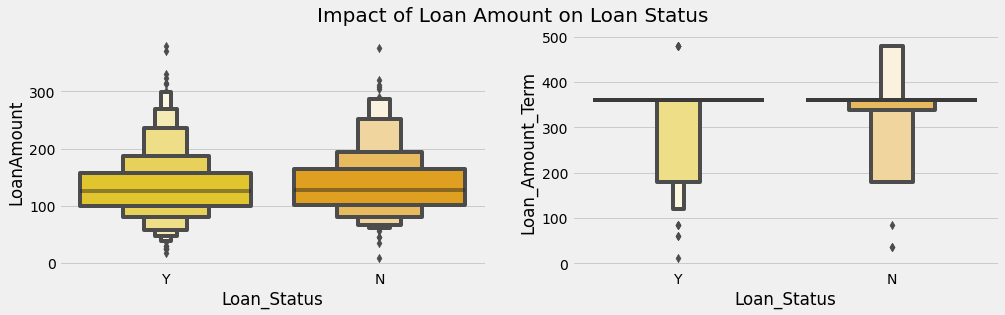

In [21]:
# Lets check the impact of Loan Amount on Loan status

plt.rcParams['figure.figsize'] = (15,4)

plt.subplot(1,2,1)
sns.boxenplot(data['Loan_Status'],data['LoanAmount'],palette = 'Wistia')

plt.subplot(1,2,2)
sns.boxenplot(data['Loan_Status'] , data['Loan_Amount_Term'] , palette = 'Wistia')

plt.suptitle('Impact of Loan Amount on Loan Status\n' , fontsize = 20)
plt.show()

In [22]:
# Lets compare all the categories with respect to the loan status to understand the overall impact

print( " Impact of Marriage on Loan Status")
print( pd.crosstab(data['Loan_Status'] , data['Married']))
print('\n')

print( " Impact of Dependents on Loan Status")
print( pd.crosstab(data['Loan_Status'] , data['Dependents']))
print('\n')

print( " Impact of Education on Loan Status")
print( pd.crosstab(data['Loan_Status'] , data['Education']))
print('\n')

print( " Impact of Employment on Loan Status")
print( pd.crosstab(data['Loan_Status'] , data['Self_Employed']))
print('\n')

print( " Impact of Property on Loan Status")
print( pd.crosstab(data['Loan_Status'] , data['Property_Area']))
print('\n')

 Impact of Marriage on Loan Status
Married       No  Yes
Loan_Status          
N             76  106
Y            130  278


 Impact of Dependents on Loan Status
Dependents     0   1   2  3+
Loan_Status                 
N            110  33  24  15
Y            240  63  74  31


 Impact of Education on Loan Status
Education    Graduate  Not Graduate
Loan_Status                        
N                 130            52
Y                 326            82


 Impact of Employment on Loan Status
Self_Employed   No  Yes
Loan_Status            
N              157   25
Y              357   51


 Impact of Property on Loan Status
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         51     65
Y                108        171    129




# Data Preparation

In [23]:
# lets check the column which are of object data types

data.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [24]:
# Lets delete the Loan Id column from the data as this column has no relation with Loan Status

# Lets check the shape of the data before deleting the columns
print("Before deleting column:" , data.shape)

data = data.drop(['Loan_ID'] , axis = 1)

# lets check the shape of the data after deleting the columns
print("After deleting the column:" , data.shape)

Before deleting column: (590, 13)
After deleting the column: (590, 12)


In [25]:
# lets encode other columns
data['Gender'] = data['Gender'].replace(('Male', 'Female') , (1,0))
data['Married'] = data['Married'].replace(('Yes', 'No') , (1,0))
data['Education'] = data['Education'].replace(('Graduate', 'Not Graduate') , (1,0))
data['Self_Employed'] = data['Self_Employed'].replace(('Yes', 'No') , (1,0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y', 'N') , (1,0))

# as seen above that urban and semi-urban property have very similar impact on Loan Status
data['Property_Area'] = data['Property_Area'].replace(('Urban', 'Semiurban' , 'Rural') , (1,1,0))

# as seen above that apart from 0 dependents , all are similar hence we merge them to avoid any confusion
data['Dependents'] = data['Dependents'].replace(('0', '1' , '2' , '3+') , (0,1,1,1))

#Lets check whether any object column left 
data.select_dtypes('object').columns

Index([], dtype='object')

In [26]:
# Lets split the target column from the data

y = data['Loan_Status']
x = data.drop(['Loan_Status'] , axis = 1)

# Lets check the shape of x and y
print("Shape of x:" , x.shape)
print("Shape of y:" , y.shape)

Shape of x: (590, 11)
Shape of y: (590,)


# Resampling for Balancing the Data

In [27]:
# It is very important to resample the data as , the target class is Highly imbalanced .
# Here we are going to use over sampling technique to resample the data.
# Lets import the SMOTE algorithm to do the same

from imblearn.over_sampling import SMOTE
x_resample , y_resample = SMOTE().fit_resample(x,y.values.ravel())

# Lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(816, 11)
(816,)


In [28]:
# lets also check the value counts of our target variable 

print("Before resampling: ")
print(y.value_counts())

print("After resampling: ")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before resampling: 
1    408
0    182
Name: Loan_Status, dtype: int64
After resampling: 
1    408
0    408
Name: 0, dtype: int64


In [29]:
# Lets split the train data from testing data
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_resample , y_resample , test_size = 0.2 , random_state = 0)

# lets print the shape again
print("Shape of x train :" , x_train.shape)
print("Shape of y train: " , y_train.shape)
print("Shape of x test  : " , x_test.shape)
print("Shape of y test  : " , y_test.shape)

Shape of x train : (652, 11)
Shape of y train:  (652, 1)
Shape of x test  :  (164, 11)
Shape of y test  :  (164, 1)


# Machine Learning modeling : Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression


In [31]:
model = LogisticRegression(random_state = 0)
model.fit(x_train , y_train)

LogisticRegression(random_state=0)

In [32]:
y_pred = model.predict(x_test)
print("Training Accuracy : " , model.score(x_train , y_train))
print("Testing Accuracy : " , model.score(x_test , y_test))

Training Accuracy :  0.7852760736196319
Testing Accuracy :  0.8292682926829268


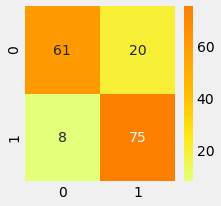

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        81
           1       0.79      0.90      0.84        83

    accuracy                           0.83       164
   macro avg       0.84      0.83      0.83       164
weighted avg       0.84      0.83      0.83       164



In [34]:
from sklearn.metrics import confusion_matrix , classification_report
cm = confusion_matrix(y_test , y_pred)
plt.rcParams['figure.figsize'] = (3,3)
sns.heatmap(cm , annot = True , cmap = 'Wistia' , fmt = '.8g')
plt.show()

# Lets also use classification report for performance analysis
cr = classification_report(y_test , y_pred)
print(cr)

# Applying Gradient Boosting

In [38]:
# lets apply decision trees
from sklearn.ensemble import GradientBoostingClassifier

model=GradientBoostingClassifier()
model.fit(x_train , y_train)

y_pred = model.predict(x_test)

print("Training Accuracy : " , model.score(x_train , y_train))
print("Testing Accuracy : " , model.score(x_test , y_test))



Training Accuracy :  0.8957055214723927
Testing Accuracy :  0.8475609756097561


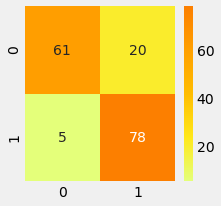

              precision    recall  f1-score   support

           0       0.92      0.75      0.83        81
           1       0.80      0.94      0.86        83

    accuracy                           0.85       164
   macro avg       0.86      0.85      0.85       164
weighted avg       0.86      0.85      0.85       164



In [39]:
# Lets analyse the performance using confusion_matrix
cm = confusion_matrix(y_test , y_pred)
plt.rcParams['figure.figsize'] = (3,3)
sns.heatmap(cm , annot = True , cmap = 'Wistia' , fmt = '.8g')
plt.show()

# Lets also use classification report for performance analysis
cr = classification_report(y_test , y_pred)
print(cr)

In [41]:
from sklearn.model_selection import cross_val_score
clf = GradientBoostingClassifier(random_state = 0)
scores = cross_val_score(clf , x_train , y_train , cv = 10)
print(scores)

[0.75757576 0.81818182 0.76923077 0.89230769 0.81538462 0.81538462
 0.75384615 0.76923077 0.8        0.75384615]
